In [52]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

In [45]:
df1 = pd.read_csv('Downloads/regression1.csv',header=None)
df1.describe()

,0,1
count,100.000000,100.000000
mean,-0.244842,2.717201
std,2.899370,8.706532
min,-4.970400,-12.671000
25%,-2.646225,-4.156400
50%,-0.381745,3.026350
75%,2.072125,10.499750
max,4.772600,19.114000


In [46]:
x = df1[0]
y = df1[1]

Apply Least Square Method to find the slope (m) and the y-intercept value (c)

In [49]:
X_mean = np.mean(x)
Y_mean = np.mean(y)

num = 0
den = 0
for i in range(len(x)):
    num += (x[i] - X_mean)*(y[i] - Y_mean)
    den += (x[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print("Slope: ", m) 
print("Intercept: ", c)       

Slope:  -2.9887758374314997
Intercept:  1.9854246046862236


Plot the data and the fitted line

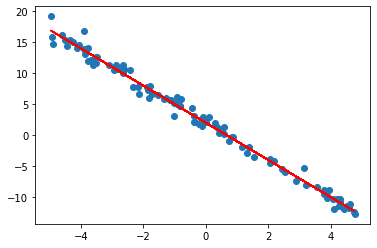

In [50]:
def my_func(x):
    return m*x + c

yfit = list(map(my_func,x))

plt.scatter(x, y)
plt.plot(x, yfit, 'r-');

The coefficient of determination (the R-square score) is calculated

In [53]:
coefficient_of_dermination = r2_score(y, yfit)
print('mean squared error: %.3f' %coefficient_of_dermination)

mean squared error: 0.991


Sub-task 2

In [9]:
df2 = pd.read_csv('Downloads/regression2.csv',header=None)

Split the data into training and testing dataset

In [70]:
x_mlp = df2.iloc[:,0:2]
y_mlp = df2[2]
x_train, x_test, y_train, y_test = train_test_split(x_mlp, y_mlp, test_size=0.30, random_state=1)

Train the MLP using different number of nodes in its hidden layer, 3-fold cross validation and mean squared error as an evaluation metric. The reason for choosing these number of nodes is that it is high enough to capture the complexity in the data, but not too high that make the model overfits the data.

In [102]:
mlp = MLPRegressor(random_state=1)

params = {
    'hidden_layer_sizes': [500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000],
}

model = GridSearchCV(mlp, param_grid = params, scoring = 'neg_mean_squared_error', n_jobs=-1, cv=3)
model.fit(x_train, y_train)

C:\Users\bachv\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPRegressor(random_state=1), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [500, 750, 1000, 1250, 1500,
                                                1750, 2000, 2250, 2500, 2750,
                                                3000]},
             scoring='neg_mean_squared_error')

Plot the result of validation. The model have the best performance with 750 nodes in the hidden layer and this number will not make the model overfit the data so we will choose this for our final model.

{'hidden_layer_sizes': 750}
732.868860614784


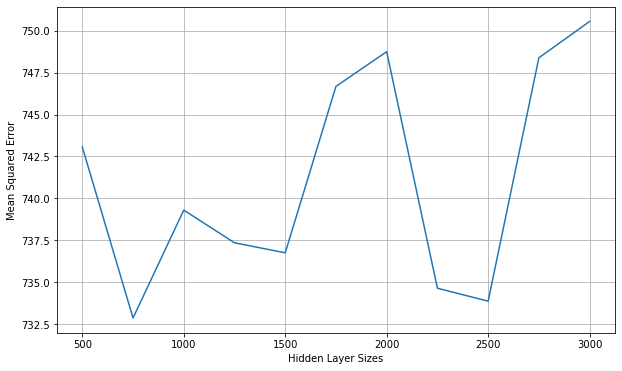

In [103]:
results = pd.DataFrame()
# collect parameter list
results['hidden_layer_sizes'] = model.cv_results_['param_hidden_layer_sizes']
# collect test scores
results['mse'] = -model.cv_results_['mean_test_score']

plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(results['hidden_layer_sizes'], results['mse'])
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Squared Error')
plt.grid()

print(model.best_params_)
print(-model.best_score_)

In [104]:
y_pred = model.predict(x_test)

Calculate and print out the generalisation error

In [99]:
print(metrics.mean_squared_error(y_test, y_pred))

645.3751439277952
